# Import Libraries

In [1]:
import sklearn.datasets 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import dataset from sklearn library

In [2]:
breast_cancer = sklearn.datasets.load_breast_cancer()

In [3]:
X = breast_cancer.data
Y = breast_cancer.target

In [4]:
data = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)

In [5]:
data['class'] = breast_cancer.target

In [6]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


# Train_test_split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = data.drop('class', axis =1)
Y = data['class']

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify = Y, random_state = 1) # Random state is applied so that the loop runs with same values everytime 

In [11]:
print(X_train.mean(), X_test.mean(), X.mean())

mean radius                 14.058656
mean texture                19.309668
mean perimeter              91.530488
mean area                  648.097266
mean smoothness              0.096568
mean compactness             0.105144
mean concavity               0.089342
mean concave points          0.048892
mean symmetry                0.181961
mean fractal dimension       0.062979
radius error                 0.403659
texture error                1.206856
perimeter error              2.861173
area error                  39.935506
smoothness error             0.007067
compactness error            0.025681
concavity error              0.032328
concave points error         0.011963
symmetry error               0.020584
fractal dimension error      0.003815
worst radius                16.194275
worst texture               25.644902
worst perimeter            106.757715
worst area                 871.647852
worst smoothness             0.132592
worst compactness            0.257415
worst concav

# Perceptron model

In [12]:
class Perceptron:

  def __init__(self):
    self.w = None
    self.b = None

  def model(self, x):
    return 1 if (np.dot(self.w, x) >= self.b) else 0

  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return Y

  def fit(self, X, Y):

    self.w = np.ones(X.shape[1])
    self.b = 0

    for x, y in zip(X, Y):
      y_pred = self.model(x)
      if y == 1 and y_pred == 0:
        self.w = self.w + x
        self.b = self.b + 1
      elif y == 0 and y_pred == 1:
        self.w = self.w - x
        self.b = self.b - 1

In [13]:
perceptron = Perceptron()

In [14]:
X_train = X_train.values
X_test = X_test.values

In [15]:
perceptron.fit(X_train, Y_train)

Weights plot

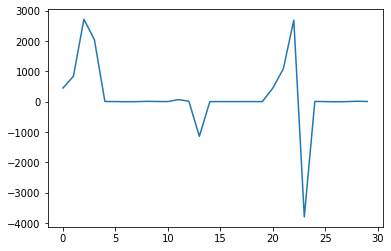

In [16]:
plt.plot(perceptron.w)
plt.show()

# Metrics

In [17]:
from sklearn.metrics import accuracy_score

y_pred_train = perceptron.predict(X_train)
print(accuracy_score(y_pred_train, Y_train))

0.373046875


In [18]:
print(X_test.shape)
y_pred_test = perceptron.predict(X_test)
print(accuracy_score(y_pred_test, Y_test))

(57, 30)
0.3684210526315789


# Model with iteration

In [30]:
""" Epochs are going through the data over and over from first or from where it is assigned."""
""" Learning rate is added to the parameter multiplication here"""
""" Both Epochs and Learning rate are called as Hyper parameters which works in conjunction """

class Perceptron_epoch:

  def __init__(self):
    self.w = None
    self.b = None

  def model(self, x):
    return 1 if (np.dot(self.w, x) >= self.b) else 0

  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return Y

  def fit(self, X, Y, epochs = 1, lr = 1):

    self.w = np.ones(X.shape[1])
    self.b = 0

    wt_matrix = []    # Matrix of weights for animation purpose. Should contains weights for all rows with all columns

    accuracy = {}
    max_accuracy = 0

    for i in range(epochs):
      for x, y in zip(X, Y):
        y_pred = self.model(x)
        if y == 1 and y_pred == 0:
          self.w = self.w + lr * x    # lr is the learning rate 
          self.b = self.b + lr * 1
        elif y == 0 and y_pred == 1:
          self.w = self.w - lr * x
          self.b = self.b - lr * 1

      wt_matrix.append(self.w)

      accuracy[i] = accuracy_score(self.predict(X),Y)
      if (accuracy[i] > max_accuracy):
        max_accuracy = accuracy[i]
        chkptw = self.w     # Checkpoints for w and b (Parameters) corresponding to highest accuracy.
        chkptb = self.b     # Checkpoint is done to capture the optimal parameters of (w, b) calculated during training set with highest accuracy. 
    
    self.w = chkptw    # Assigning checkpointed w and b with highest accuracy model.
    self.b = chkptb 

    print(max_accuracy)
    plt.plot(list(accuracy.values()))
    plt.ylim([0,1])
    plt.grid()
    plt.show()

    return np.array(wt_matrix)
    

In [20]:
perceptron = Perceptron_epoch()

0.927734375


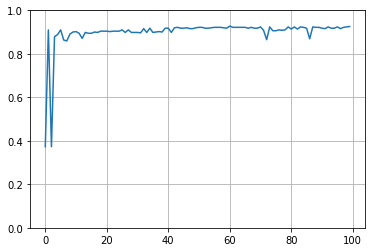

In [21]:
wt_matrix = perceptron.fit(X_train, Y_train, 100)     # X_train, Y_train, epoch and Learning rate.

In [22]:
Y_pred_train = perceptron.predict(X_train)
print(accuracy_score(Y_pred_train, Y_train))

0.927734375


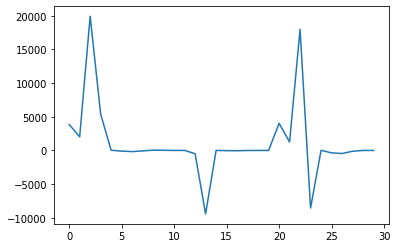

In [23]:
plt.plot(perceptron.w)
plt.show()

# Weight animation

In [24]:
%matplotlib inline

In [25]:
from matplotlib import animation, rc
from IPython.display import HTML

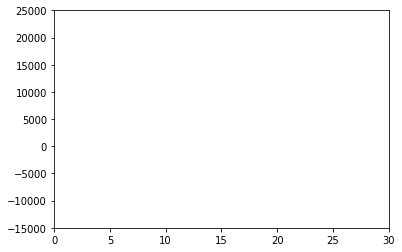

In [26]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, wt_matrix.shape[1]))
ax.set_ylim((-15000, 25000))

line, = ax.plot([], [], lw=2)

In [27]:
# animation function. This is called sequentially
def animate(i):
    x = list(range(wt_matrix.shape[1]))
    y = wt_matrix[i, :]
    line.set_data(x, y)
    return (line,)

In [28]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=100, interval=200, blit=True)

In [29]:
HTML(anim.to_html5_video())